[10.5408684 +2.97320709j  4.44278805-4.13824463j -5.98365644+2.16503754j]


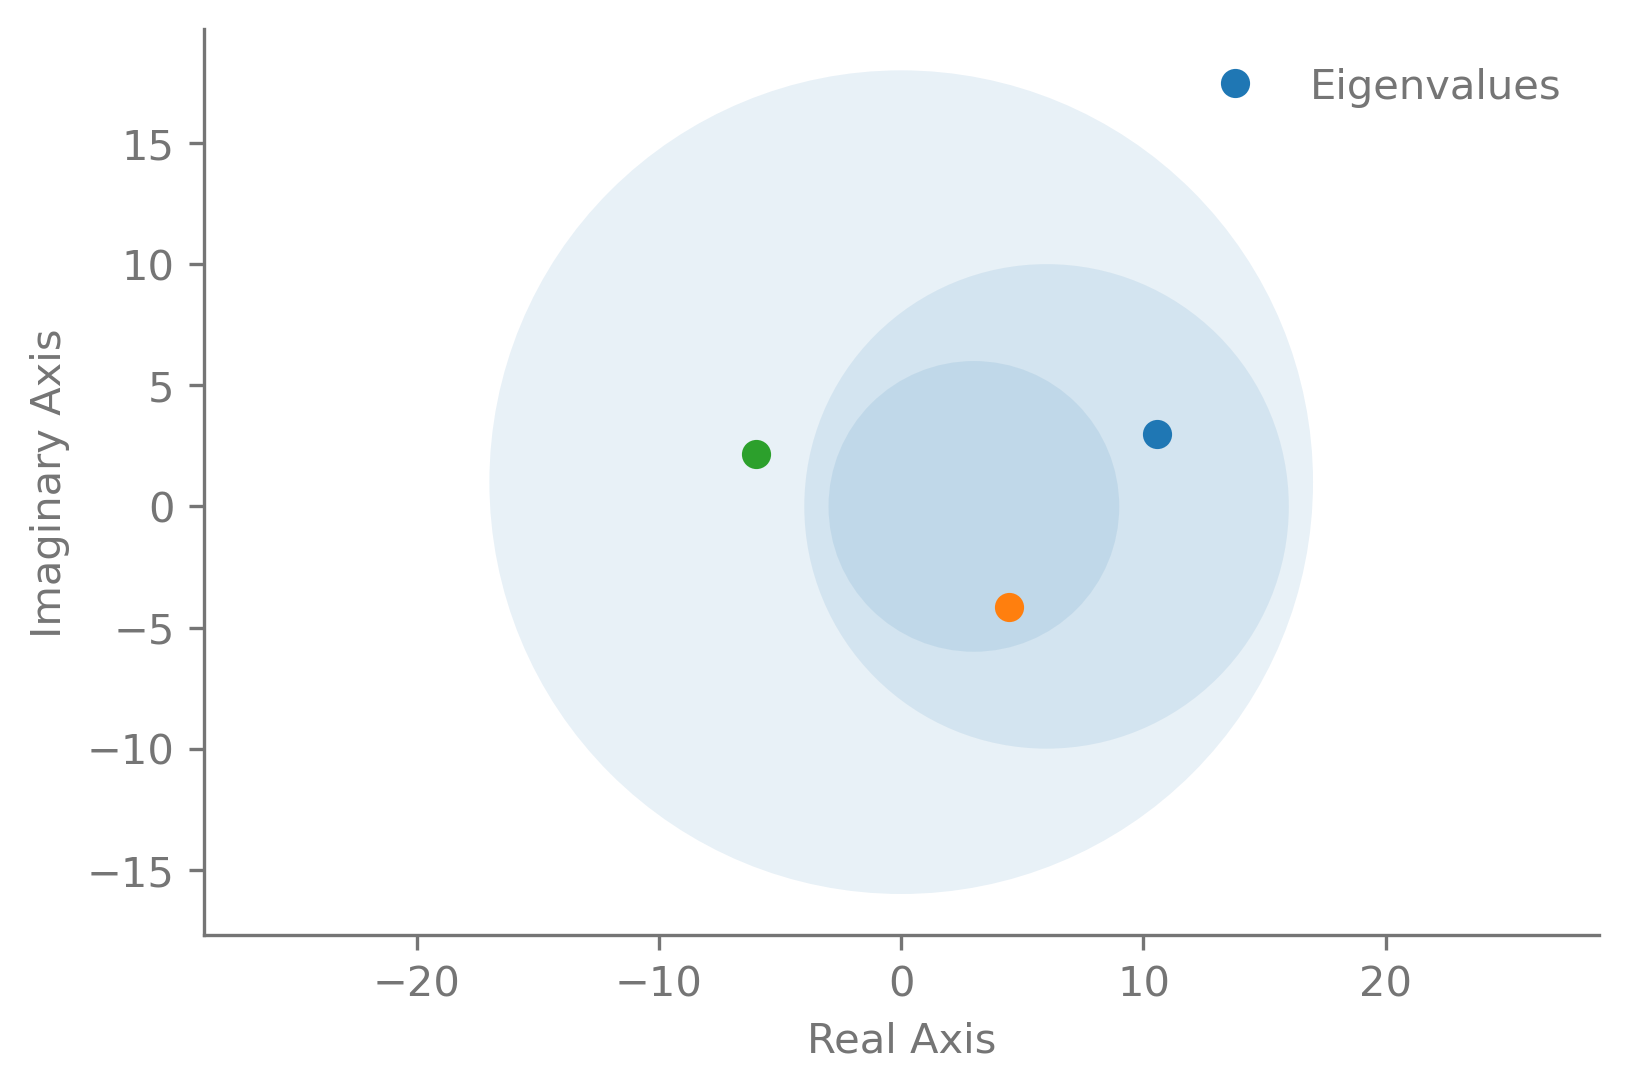

In [3]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from numpy import linalg as LA

def demoGerschgorin(A):

    n = len(A)
    eval, evec = LA.eig(A)

    print(eval)

    patches = []
    
    # draw discs
    
    for i in range(n):
        xi = np.real(A[i,i])
        yi = np.imag(A[i,i])
        ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) 
        
        circle = Circle((xi, yi), ri)
        patches.append(circle)

    fig, ax = plt.subplots()

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)
    ax.add_collection(p)
    plt.axis('equal')
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")
    
    for xi, yi in zip(np.real(eval), np.imag(eval)):
        yeet = plt.plot(xi, yi,'o')
    

    #adjust image resolution
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.legend(["Eigenvalues"], frameon=False)
    plt.show()

A = np.array([[3,2j,4],[7j,6,3],[9,8,1j]])

demoGerschgorin(A)


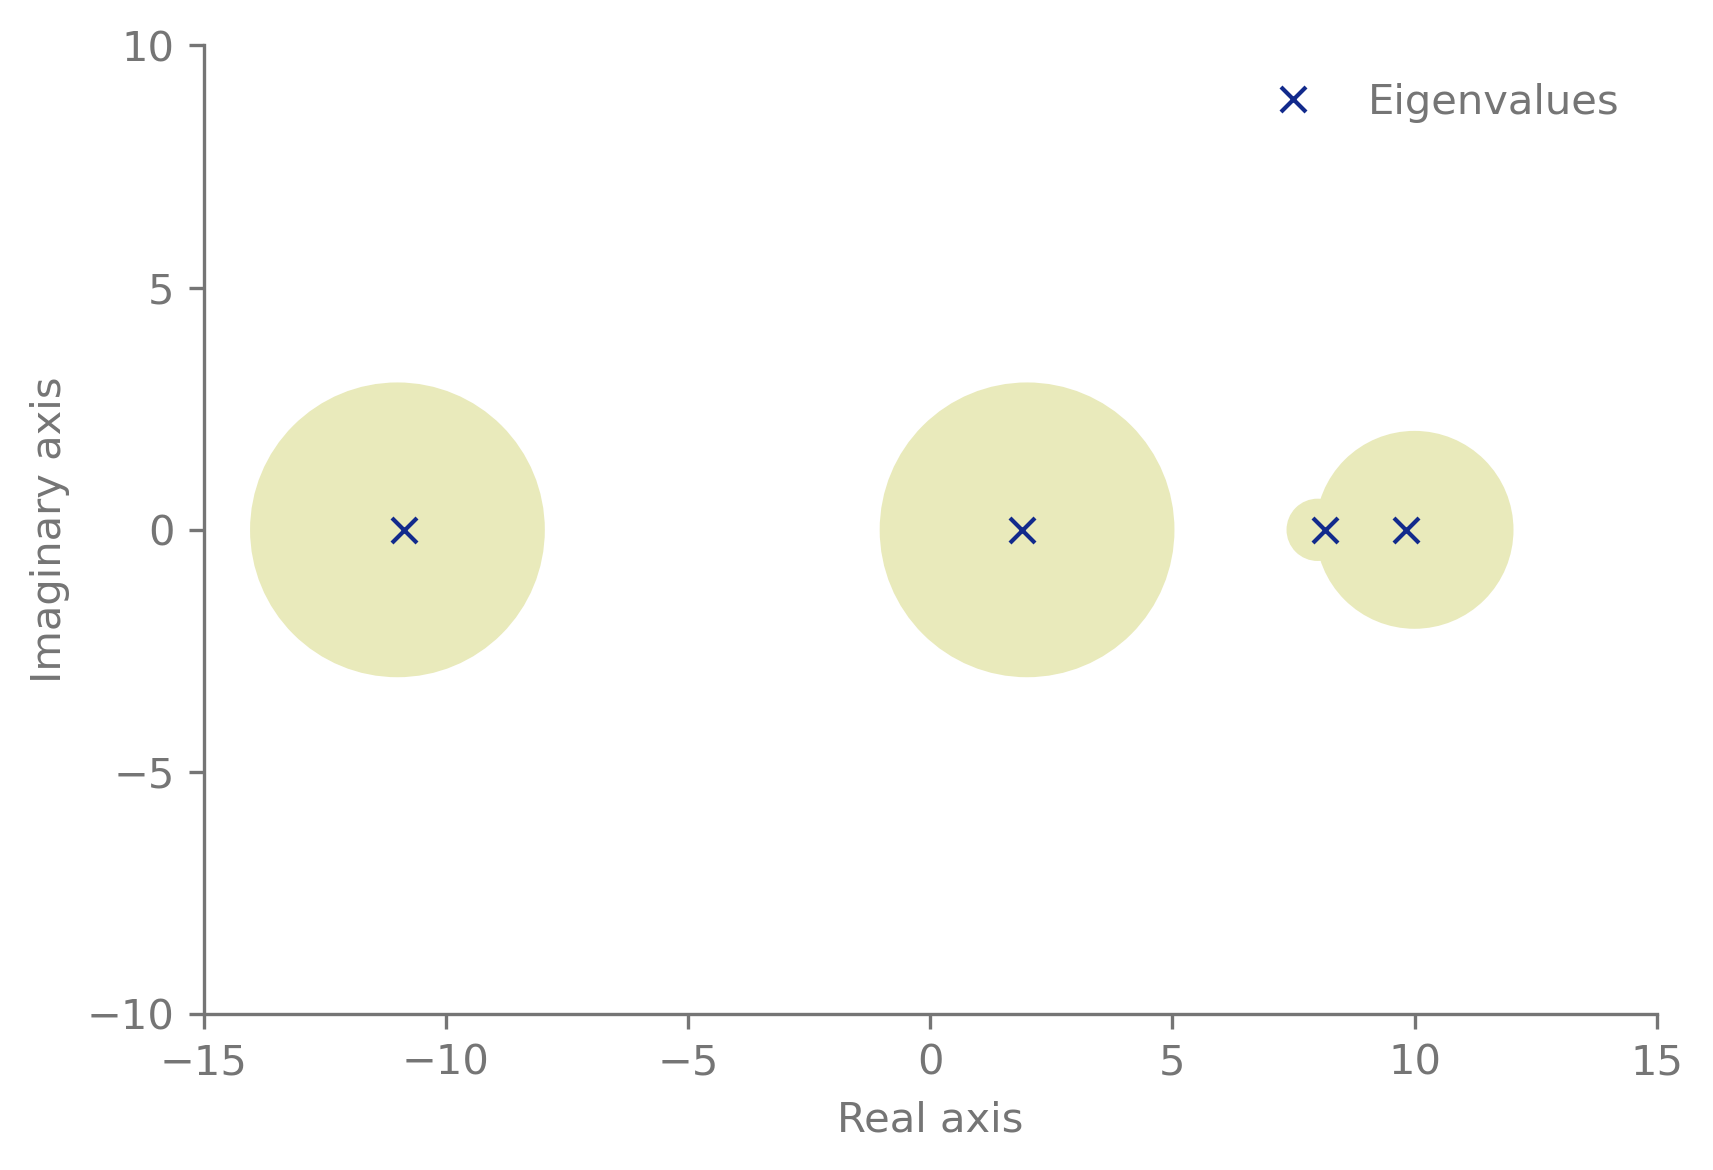

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Graph setup
yellow = "#e9eabb"
blue = "#122a8c"
gray = '#757575'
plt.rcParams["text.color"] = gray
plt.rcParams["font.size"] = 10
plt.rcParams["xtick.color"] = gray
plt.rcParams["ytick.color"] = gray
plt.rcParams["axes.labelcolor"] = gray
plt.rcParams["axes.edgecolor"] = gray
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


A = np.array([
  [10, -1, 0, 1],
  [0.2, 8, 0.2, 0.2],
  [1, 1, 2, 1],
  [-1, -1, -1, -11]])

vals = np.linalg.eigvals(A)
fig = plt.figure(figsize=(6, 4))
for cont, val in enumerate(vals):
    real = np.real(val)
    imag = np.imag(val)
    center = A[cont, cont]
    radius = sum(np.abs(A[cont, k]) for k in range(len(A)) if k != cont)
    circle = plt.Circle((center, 0), radius, color=yellow)
    plt.plot(real, imag, color=blue, marker="x", linewidth=0)
    plt.gca().add_artist(circle)

plt.legend(["Eigenvalues"], frameon=False)
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.yticks([-10, -5, 0, 5, 10])
plt.axis("image")
plt.xlim(-15, 15)
plt.ylim(-10, 10)
fig.tight_layout()
#plt.savefig("Gershgorin Disk Theorem Example.svg", bbox_inches="tight")
plt.show()